In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

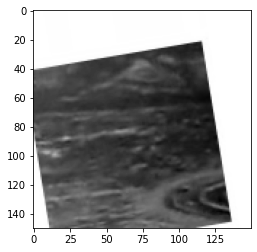

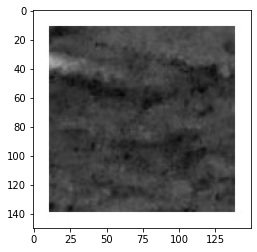

In [2]:
TRAIN_DIR = "C:/Users/Arthur_Noh/Desktop/dataset/Train"
TEST_DIR = "C:/Users/Arthur_Noh/Desktop/dataset/Test"

CATEGORIES = ['blackice','road','snow','wet']

for category in CATEGORIES:
    path=os.path.join(TRAIN_DIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #GRAYSCALE=흑백, COLOR_BGR2RGB=컬러
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
    
for category in CATEGORIES:
    path=os.path.join(TEST_DIR,category)
    for img in os.listdir(path):  
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #뒤에 GRAYSCALE은 흑백으로 변환한 것을 의미함
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

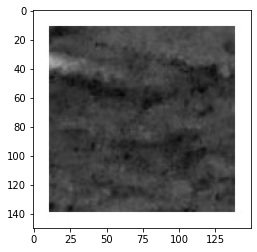

In [3]:
IMG_SIZE=150

new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [4]:
training_data = []
testing_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TRAIN_DIR, category)
        class_num = CATEGORIES.index(category)
        
        for image in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, image),
                                    cv2.IMREAD_GRAYSCALE)
                fix_img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                training_data.append([fix_img_arr, class_num])
            except Exception as e:
                pass
            
def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(TEST_DIR, category)
        class_num = CATEGORIES.index(category)
        
        for image in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, image),
                                    cv2.IMREAD_GRAYSCALE)
                fix_img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                testing_data.append([fix_img_arr, class_num])
            except Exception as e:
                pass
            
create_training_data()
create_testing_data()

In [5]:
print(len(training_data))
print(len(testing_data))

40000
4000


In [6]:
import random

random.shuffle(training_data)
random.shuffle(testing_data)

train_X=[]
test_X=[]
train_y=[]
test_y=[]

for features, label in training_data:
    train_X.append(features)
    train_y.append(label)
    
for features, label in testing_data:
    test_X.append(features)
    test_y.append(label)
    
train_X=np.array(train_X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_X=np.array(test_X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
train_y=np.array(train_y)
test_y=np.array(test_y)

train_X=train_X/255
test_X=test_X/255

In [7]:
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(40000, 150, 150, 1) (40000,)
(4000, 150, 150, 1) (4000,)


In [8]:
print(train_y)
print(test_y)

[3 0 0 ... 2 0 3]
[3 2 3 ... 0 1 2]


In [9]:
from tensorflow import keras
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(150,150,1), kernel_size=(3,3), filters=32, padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(150,150,1), kernel_size=(3,3), filters=32, padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
# sparse 빼도됨
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 64)        3

In [10]:
gpus=tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
     # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu,True)
        logical_gpus=tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus),"Physical GPUs,",len(logical_gpus),"Logical GPUs")
    except RuntimeError as e:
        #Memory growth must be set before GPUs have been initialized
        print(e)

Physical devices cannot be modified after being initialized


In [11]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss', mode='min', min_delta=1e-3, patience=5, verbose=1)
history=model.fit(train_X,train_y,epochs=30,validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
1000/1000 [==============================] - 25s 25ms/step - loss: 0.8928 - accuracy: 0.5351 - val_loss: 0.7478 - val_accuracy: 0.6852
Epoch 2/30
1000/1000 [==============================] - 24s 24ms/step - loss: 0.7132 - accuracy: 0.6878 - val_loss: 0.7017 - val_accuracy: 0.7126
Epoch 3/30
1000/1000 [==============================] - 24s 24ms/step - loss: 0.5784 - accuracy: 0.7607 - val_loss: 0.4367 - val_accuracy: 0.8239
Epoch 4/30
1000/1000 [==============================] - 24s 24ms/step - loss: 0.4515 - accuracy: 0.8236 - val_loss: 0.4345 - val_accuracy: 0.8322
Epoch 5/30
1000/1000 [==============================] - 24s 24ms/step - loss: 0.3940 - accuracy: 0.8485 - val_loss: 0.2824 - val_accuracy: 0.8925
Epoch 6/30
1000/1000 [==============================] - 24s 24ms/step - loss: 0.3567 - accuracy: 0.8644 - val_loss: 0.2841 - val_accuracy: 0.8950
Epoch 7/30
1000/1000 [==============================] - 23s 23ms/step - loss: 0.3170 - accuracy: 0.8787 - val_loss: 0.3823 -

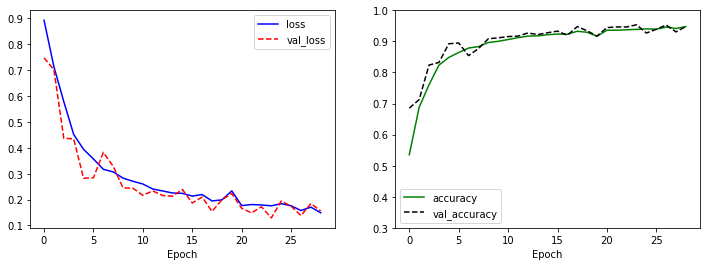

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.3,1)
plt.legend()

plt.show()

In [13]:
model.evaluate(train_X,train_y,verbose=0)

[0.1202082484960556, 0.9584500193595886]

In [14]:
model.evaluate(test_X,test_y,verbose=0) 

[0.15746808052062988, 0.9487500190734863]

In [15]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
predictions=model.predict(test_X)
print(predictions)

[[6.4097214e-13 4.6946163e-09 6.9480837e-21 1.0000000e+00]
 [1.2846924e-04 1.2158611e-07 9.9984038e-01 3.1041443e-05]
 [2.7261780e-09 1.5484540e-06 3.8534883e-14 9.9999845e-01]
 ...
 [9.9963105e-01 8.4421065e-10 3.6882493e-04 5.5050631e-08]
 [8.1955269e-14 9.9675888e-01 8.6546407e-16 3.2411600e-03]
 [5.9927832e-02 4.4485914e-05 9.3765444e-01 2.3732746e-03]]


In [18]:
print(confusion_matrix(test_y,np.argmax(predictions,axis=1)))
print(classification_report(test_y,np.argmax(predictions,axis=1)))

[[928   8  55   9]
 [  5 933   1  61]
 [ 35   0 954  11]
 [  0   4  16 980]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1000
           1       0.99      0.93      0.96      1000
           2       0.93      0.95      0.94      1000
           3       0.92      0.98      0.95      1000

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000



In [19]:
predictions2=model.predict(train_X)
print(confusion_matrix(train_y,np.argmax(predictions2,axis=1)))
print(classification_report(train_y,np.argmax(predictions2,axis=1)))

[[9368   27  542   63]
 [  38 9476    8  478]
 [ 218    4 9721   57]
 [  25   28  174 9773]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     10000
           1       0.99      0.95      0.97     10000
           2       0.93      0.97      0.95     10000
           3       0.94      0.98      0.96     10000

    accuracy                           0.96     40000
   macro avg       0.96      0.96      0.96     40000
weighted avg       0.96      0.96      0.96     40000



In [43]:
confusion_mtx = confusion_matrix(train_y,np.argmax(predictions2,axis=1))
classes = ['bi', 'dr', 'sw', 'wt']

In [44]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], horizontalalignment="center", color='white' if cm[i, j] > thresh else "black") 
    
    plt.tight_layout()

In [45]:
import itertools

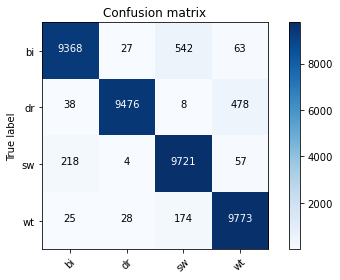

In [46]:
plot_confusion_matrix(confusion_mtx, classes)